In [1]:
#in_rds = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
labels_meta = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/pseudotime"
order_f = ""
to_de = FALSE
#"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/" 

In [2]:
labels.meta <- read.table(labels_meta, sep="\t")

In [3]:
# BiocManager::install("Rsamtools")
# install.packages("Signac")
#library(BiocManager)
## have to do this because the remotes package has stupid defaults
## and will error on something as trivial as a binary package being built on a slightly different R version
#Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS = "true")
#BiocManager::install("cole-trapnell-lab/monocle3")
#install.packages('R.utils')
#remotes::install_github('satijalab/seurat-wrappers')

library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(ggplot2)
library(patchwork)
set.seed(1234)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

In [4]:
se <- readRDS(se_f)
se <- AddMetaData(se, labels.meta["cluster_labels"])


In [5]:
se

An object of class Seurat 
221404 features across 18672 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [6]:
DefaultAssay(se) <- "ATAC"


In [7]:
# Seurat_Object_Diet <- DietSeurat(seurat_object, graphs = "pca")
# SCE <- as.SingleCellExperiment(Seurat_Object_Diet)

In [10]:
library(reticulate)


In [ ]:
se.cds <- as.cell_data_set(se)
se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")
cds_subset <- choose_cells(se.cds)

In [8]:
se.cds <- learn_graph(se.cds, use_partition = TRUE)


Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[2]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message:
“Monocle 3 trajectories require cluster partitions,

ERROR: Error in partitionCells(se.cds): could not find function "partitionCells"


In [ ]:
#cds_sub <- choose_graph_segments(cds)


In [ ]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  show_trajectory_graph = TRUE, label_principal_points = TRUE
)

In [9]:
# order cells
# interactive more or not
if (order_f == ""){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_168','Y_157', 'Y_127')) 
}else{
    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
}

Cells aren't colored in a way that allows them to be grouped.

Saving 6.67 x 6.67 in image



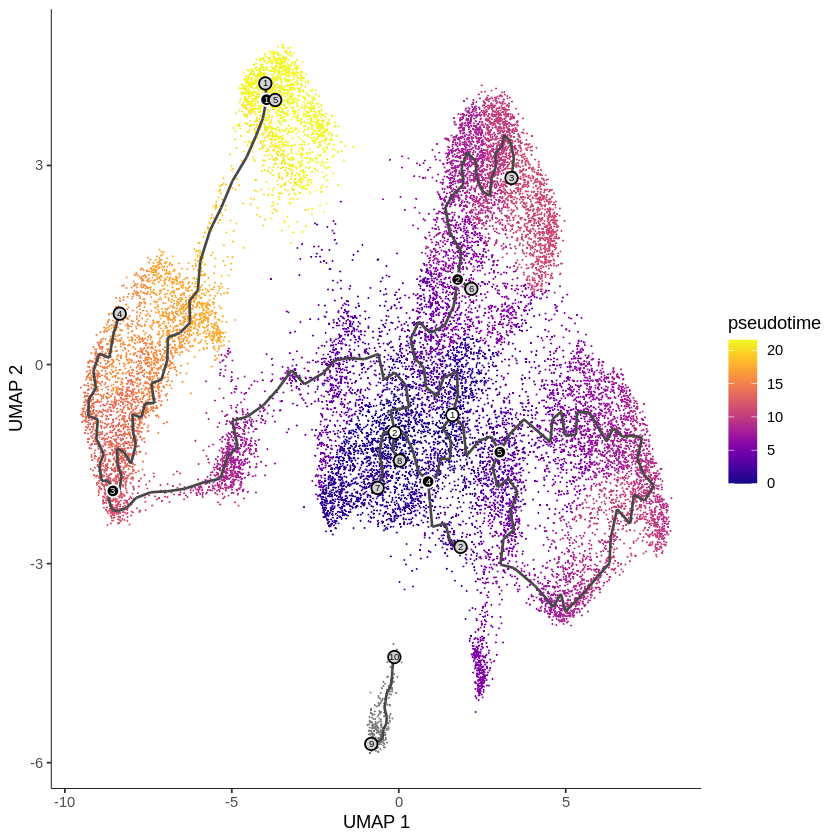

In [10]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)
ggsave(file.path(outdir, "SE.pseudotime.trajectory.png"))


In [11]:
se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)


In [12]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels,pseudotime
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<chr>,<I<chr>>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,⋯,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4,eosonophil,21.3854598
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,⋯,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30,MPP/CMP/GMP C,7.0874378
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,⋯,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15,MPP/CMP/GMP C,2.4482526
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,⋯,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9,erythroid,14.8856899
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,⋯,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17,eosonophil,21.4327756
Control_AAACGAAAGTGTCGGA-1,Control,756,756,3362,524,15,12,154,836,1821,⋯,1133,1068,AAACGAAAGTGTCGGA-1_Control,Control_AAACGAAAGTGTCGGA-1,3,1,Control,1_3,erythroid,12.1917311
Control_AAACGAACACTCGCAG-1,Control,1444,1444,6285,831,22,23,319,1872,3218,⋯,1855,1658,AAACGAACACTCGCAG-1_Control,Control_AAACGAACACTCGCAG-1,21,0,Control,0_21,neutrophil,10.9396474
Control_AAACGAAGTCTTAGCA-1,Control,1921,1921,10456,1353,31,23,417,3769,4863,⋯,2918,2480,AAACGAAGTCTTAGCA-1_Control,Control_AAACGAAGTCTTAGCA-1,20,1,Control,1_20,erythroid,13.2182983
Control_AAACGAAGTGAGGGTT-1,Control,425,425,1347,226,5,9,48,307,752,⋯,439,426,NA,Control_AAACGAAGTGAGGGTT-1,None,None,None,None,MPP/CMP/GMP D,0.6536138


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



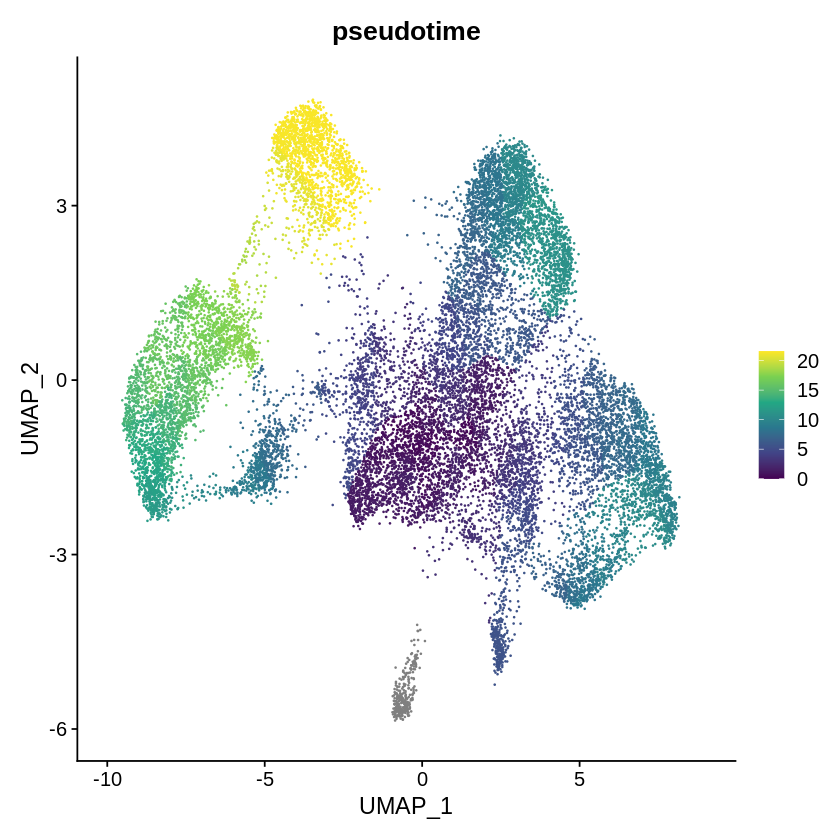

Saving 6.67 x 6.67 in image



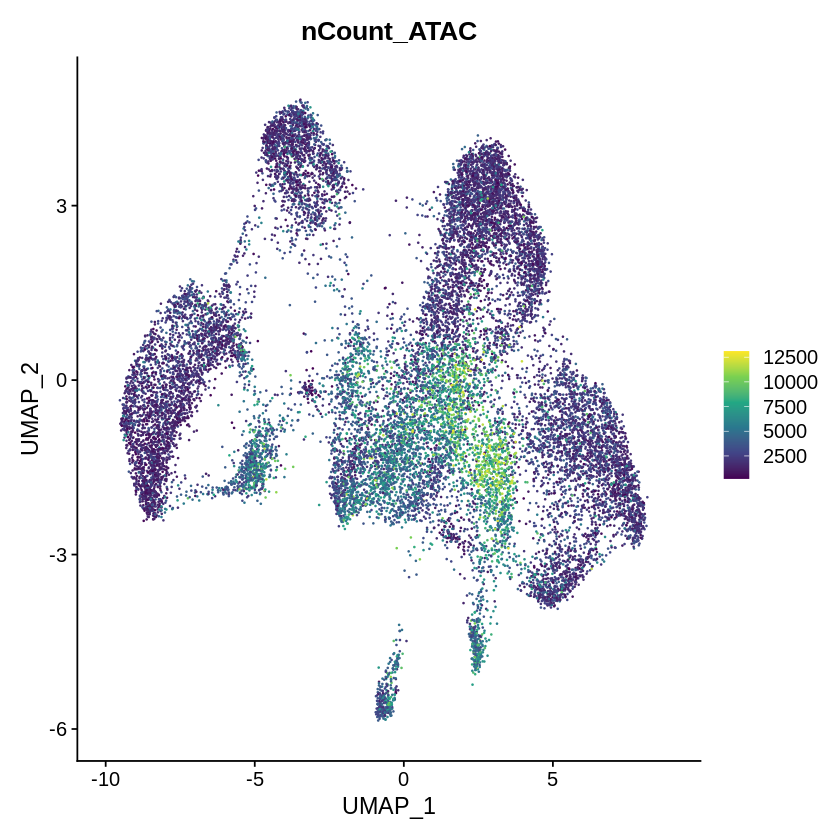

In [14]:
FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))




In [15]:
#colData(se.cds)$cluster_labels <- se[["seurat_clusters"]]
#colData(se.cds)$cluster_labels

Saving 6.67 x 6.67 in image



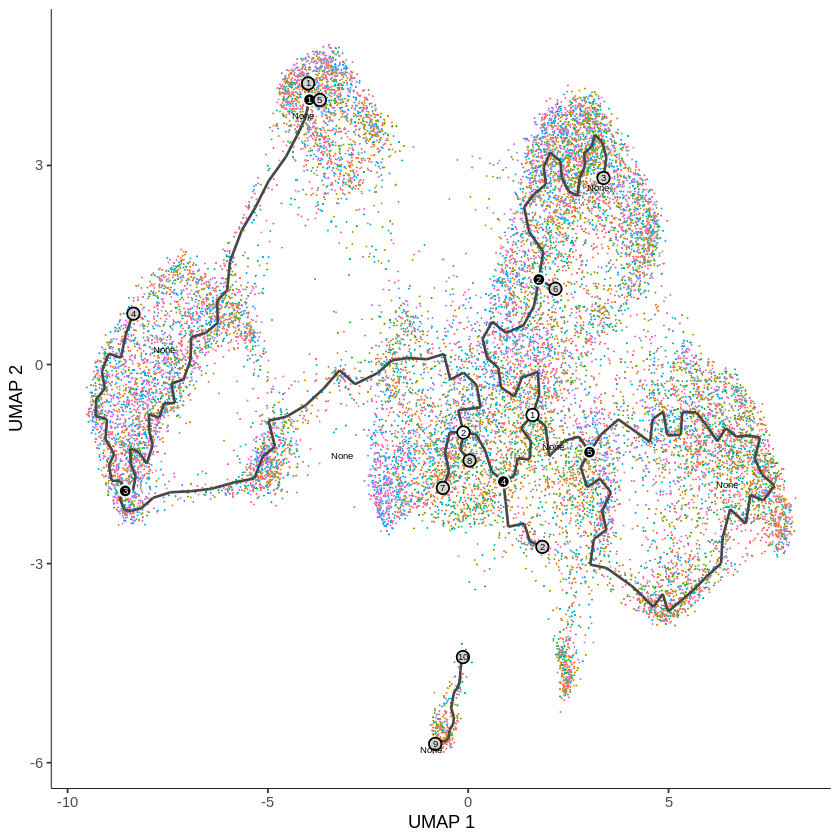

Saving 6.67 x 6.67 in image



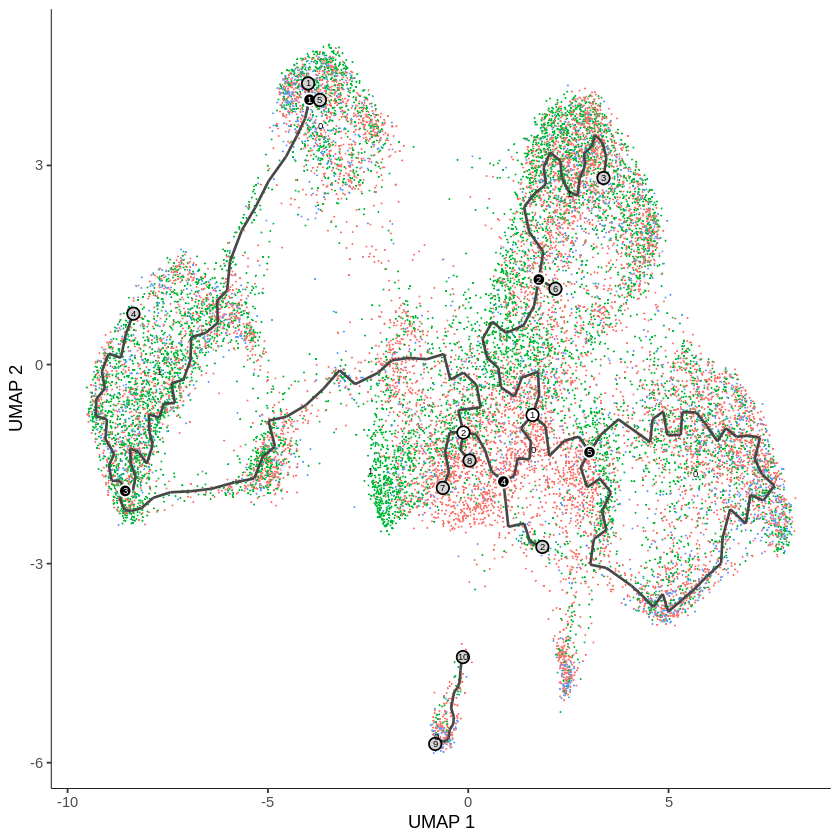

In [16]:

#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
#plot_cells(se.cds, color_cells_by="seurat_clusters")
#ggsave(file.path(outdir, "pseudo.clusters.png"))
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="name")
ggsave(file.path(outdir, "pseudo.clone.png"))

#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="donor")
ggsave(file.path(outdir, "pseudo.donor.png"))

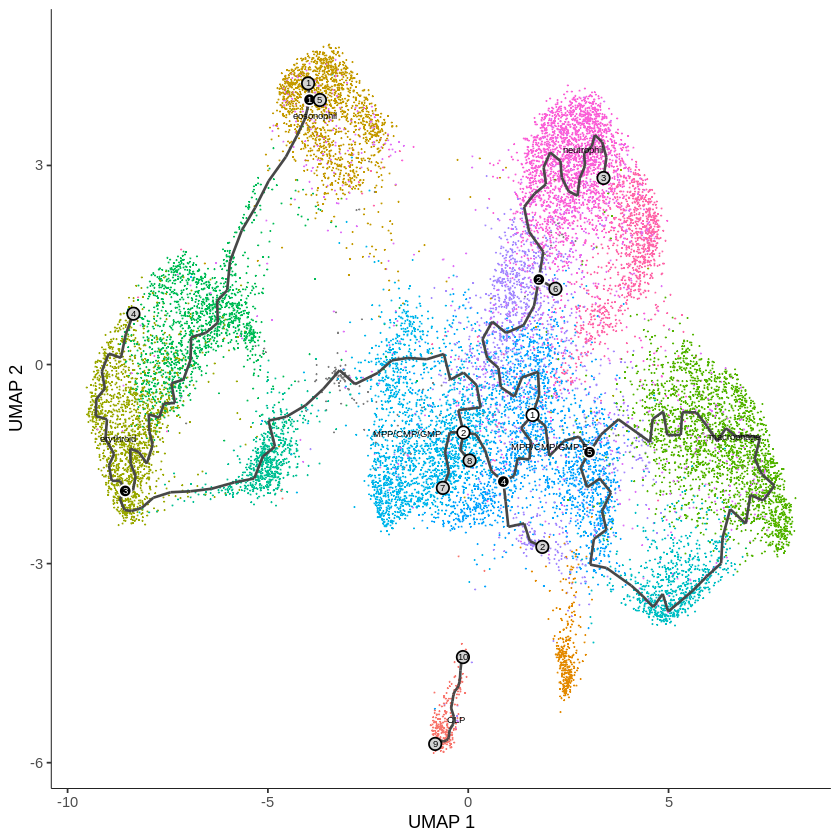

In [17]:
#plot_cells(se.cds, color_cells_by="seurat_clusters", label_cell_groups=TRUE)
plot_cells(se.cds, color_cells_by="cluster_labels", label_cell_groups=TRUE)

In [18]:
saveRDS(se, file.path(outdir, "SE.pseudotime.rds"))

saveRDS(se.cds, file.path(outdir, "SE.cds.rds"))

## Pseudotime DE
https://broadinstitute.github.io/2019_scWorkshop/functional-pseudotime-analysis.html

In [19]:
if(to_de){
    de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)
    write.table(de_res, file.path(outdir, "branch.de.atac.tsv"),quote = FALSE, sep="\t")
    de_res
}

In [20]:
#de_res_rna <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)

In [21]:
# de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 3)

# genes_plt <- c("Ube2c", "Mrps12", "Hspa12a", "Igfbp3")
# plot_cells(se.cds, genes = genes_plt,
#            show_trajectory_graph = TRUE,
#            label_cell_groups = FALSE,
#            label_leaves = FALSE)